<div class="anchor" style="color:rosybrown" > 
    <h2 style="font-size:200%; text-align:center">Introdução</h2>  
<p>A indústria de vestuário emerge como um dos pilares essenciais da globalização industrial na contemporaneidade. Caracterizada por uma intensa dependência de mão de obra e uma variedade de processos manuais, essa indústria é vital para atender à crescente demanda global por produtos têxteis. A eficiência na produção e na entrega desempenha um papel crucial nesse cenário, dependendo grandemente do desempenho dos colaboradores nas instalações de fabricação de vestuário.

Assim, torna-se imperativo para os líderes e gestores na indústria de vestuário monitorar, analisar e antecipar o desempenho da produtividade das equipes de trabalho em suas unidades fabris.

Nesse contexto, dispomos de um conjunto de dados abrangente que engloba atributos-chave do processo de fabricação de vestuário, correlacionados com a produtividade dos funcionários. Esses dados foram meticulosamente coletados e validados por especialistas do setor. No âmbito do nosso projeto de ciência de dados, concentramo-nos na aplicação de técnicas avançadas de aprendizado de máquina para prever a produtividade.

A habilidade de antecipar o desempenho futuro das equipes de trabalho é fundamental para aprimorar a eficiência operacional. Isso proporciona às empresas do setor de vestuário ferramentas poderosas para otimizar o desempenho de suas equipes e responder de forma ágil às demandas dinâmicas do mercado.</p>
<h2 style="font-size:200%; text-align:center">Metadados</h2>  

| Nº  | Atributo               | Descrição                                                                                                      |
|----|------------------------|-----------------------------------------------------------------------------------------------------------------|
| 01 | date                   | Data no formato MM-DD-YYYY                                                                                     |
| 02 | day                    | Dia da semana                                                                                                  |
| 03 | quarter                | Uma parte do mês. Um mês foi dividido em quatro trimestres                                                      |
| 04 | department             | Departamento associado à instância                                                                             |
| 05 | team_no                | Número da equipe associado à instância                                                                         |
| 06 | no_of_workers          | Número de trabalhadores em cada equipe                                                                         |
| 07 | no_of_style_change     | Número de mudanças no estilo de um produto específico                                                           |
| 08 | targeted_productivity  | Produtividade alvo estabelecida pela Autoridade para cada equipe a cada dia                                      |
| 09 | smv                    | Valor Minuto Padrão, é o tempo alocado para uma tarefa                                                          |
| 10 | wip                    | Trabalho em andamento. Inclui o número de itens inacabados para produtos                                         |
| 11 | over_time              | Representa a quantidade de horas extras realizadas por cada equipe em minutos                                    |
| 12 | incentive              | Representa a quantia de incentivo financeiro (em BDT) que habilita ou motiva uma determinada ação                |
| 13 | idle_time              | A quantidade de tempo em que a produção foi interrompida devido a várias razões                                 |
| 14 | idle_men               | O número de trabalhadores que ficaram parados devido à interrupção da produção                                   |
| 15 | actual_productivity    | A % real de produtividade entregue pelos trabalhadores. Varia de 0 a 1.       

<div class="anchor" style="color:rosybrown" id='home'> 
    <h1 style="font-size:200%; text-align:center">Sumário</h1>  
    <ul>
        <li><a href="#imports">Bibliotecas e Importações</a></li>
        <li><a href="#tratamento">Data Wrangling</a></li>
        <li><a href="#0">Análise Exploratória de Dados</a></li>
            <ul>
                <li><a href="#0.1">Dispersão dos Dados Categóricos</a></li>
                <li><a href="#0.2">Correlação Entre os Dados Categóricos e a Produtividade</a></li>
                <li><a href="#0.3">Dispersão dos Dados Numéricos</a></li>
                <li><a href="#0.4">Correlação Entre os Dados Numéricos e a Produtividade</a></li>
            </ul>
        <li><a href="#conclusao">Conclusão</a></li>  
    </ul>
    
</div>

<div id='imports'>
<h1 id='imports'style="color:rosybrown ;text-align:center">Importações</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import graficos as gr

In [2]:
class importar_dados:
    def __init__(self):
        self.data = self.extract()
    
    def extract(self):
        """Função para coletar os dados"""
        return pd.read_csv("./Data/garments_worker_productivity.csv")
    
    def informs(self):
        """
        Função para inspecionar os dados 
        """
        print(f"\nNúmero de vazios {self.data.isnull().sum().sum()}")
        print(f"\nNúmero de duplicados {self.data.duplicated().sum()}\n")      
        display(self.data.info())
        print("Numéricos")
        description = self.data.select_dtypes(include=np.number).describe()
        unicos = self.data[description.columns].nunique().values
        description = description.T
        description['unicos'] = unicos
        display(description)
        print("Categóricos")
        display(self.data.select_dtypes(exclude=np.number).describe().T)

In [3]:
df = importar_dados().data
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [4]:
 importar_dados().informs()


Número de vazios 506

Número de duplicados 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_pr

None

Numéricos


,count,mean,std,min,25%,50%,75%,max,unicos
team,1197.0,6.426901,3.463963,1.000000,3.000000,6.000000,9.000000,12.000000,12
targeted_productivity,1197.0,0.729632,0.097891,0.070000,0.700000,0.750000,0.800000,0.800000,9
smv,1197.0,15.062172,10.943219,2.900000,3.940000,15.260000,24.260000,54.560000,70
wip,691.0,1190.465991,1837.455001,7.000000,774.500000,1039.000000,1252.500000,23122.000000,548
over_time,1197.0,4567.460317,3348.823563,0.000000,1440.000000,3960.000000,6960.000000,25920.000000,143
incentive,1197.0,38.210526,160.182643,0.000000,0.000000,0.000000,50.000000,3600.000000,48
idle_time,1197.0,0.730159,12.709757,0.000000,0.000000,0.000000,0.000000,300.000000,12
idle_men,1197.0,0.369256,3.268987,0.000000,0.000000,0.000000,0.000000,45.000000,10
no_of_style_change,1197.0,0.150376,0.427848,0.000000,0.000000,0.000000,0.000000,2.000000,3
no_of_workers,1197.0,34.609858,22.197687,2.000000,9.000000,34.000000,57.000000,89.000000,61


Categóricos


,count,unique,top,freq
date,1197,59,3/11/2015,24
quarter,1197,5,Quarter1,360
department,1197,3,sweing,691
day,1197,6,Wednesday,208


<div id='tratamento'>
<h1 id='tratamento'style="color:rosybrown ;text-align:center">Data Wrangling</h1>

<div>   
    <p style="color:rosybrown">Data wrangling é o processo de transformar e estruturar dados de um formato bruto em um formato desejado com a intenção de melhorar a qualidade deles e torná-los mais consumíveis e úteis para analytics ou machine learning.
    
Manipulações a serem feitas nos dados com base na análise anterior:
    </p>
    <li>Decompor dados temporais extraindo informações como mês</li>
    <li>Passar dados numéricos que são categóricos (com poucas classes)</li>
    <li>Preencher dados vazios</li>

</div>

In [5]:
def data_wrangling(data):
    dt = data.copy()
    
    # Decompor dados temporais
    dia = pd.to_datetime(dt['date'])
    dt['month'] = dia.dt.month
    
    # Passar dados numéricos para categóricos
    cat = dt.select_dtypes(include=np.number).nunique()[dt.select_dtypes(include=np.number).nunique()<=12].index
    for i in cat:
        dt[i] = dt[i].astype(str)
    
    # Dados Vazios
    dt = dt.fillna(0)
    
    return dt

In [6]:
df = data_wrangling(df)

<div id='0'>
<h1  style="color:rosybrown ;text-align:center">Análise Exploratória dos Dados</h1>
</div>

<div id='0.1'>
<h2 style="color:rosybrown">Distribuição dos Dados Categóricos</h2>

In [7]:
gr.Categoricos().features(df)

['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity', 'idle_time', 'idle_men', 'no_of_style_change', 'month']


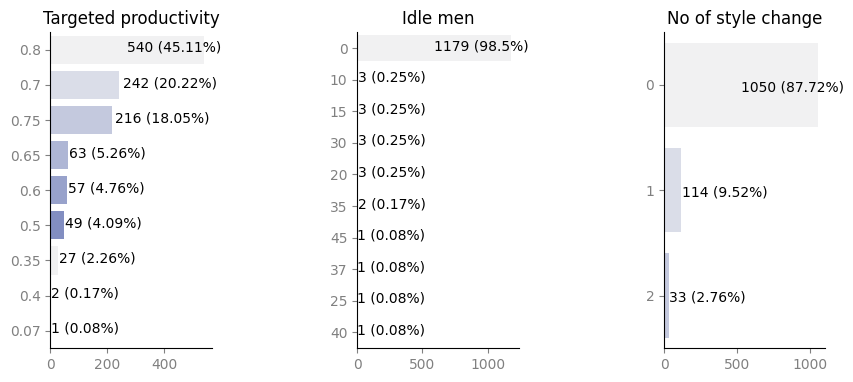

In [8]:
gr.Categoricos().plot_categorial(df, "",['targeted_productivity', 'idle_men', 'no_of_style_change'],(1,3))

- Sobre o atributo do alvo de produtividade, vemos que o objetivo de produção é, em sua maioria, 0.7 até 0.8, chegando a ser de 80% do alvo nesse intervalo. Então vemos que produtividades menores são eventos mais raros.
- O número de trabalhadores que ficaram parados devido à interrupção da produção (idle men), é composta basicamente de eventos raros.
- Por último, a mudança de estilo chega a mudar no máximo 2 vezes, sendo na maioria das vezes não alterado.

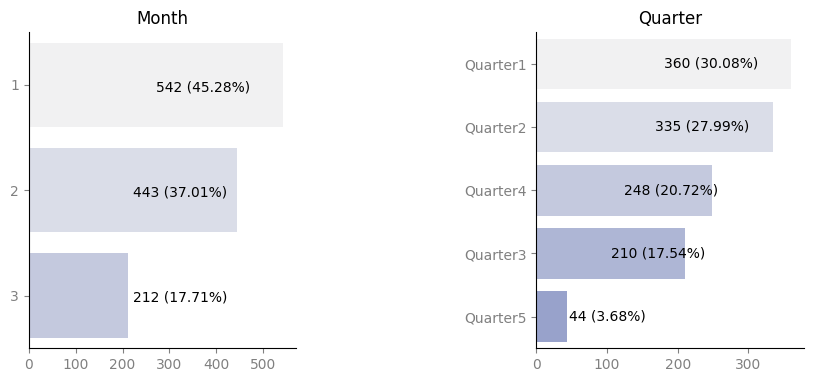

In [9]:
gr.Categoricos().plot_categorial(df, "",['month', 'quarter'],(1,2))

- O gráfico acima demonstra que há um decaimento na quantidade de dados ao longo do tempo.

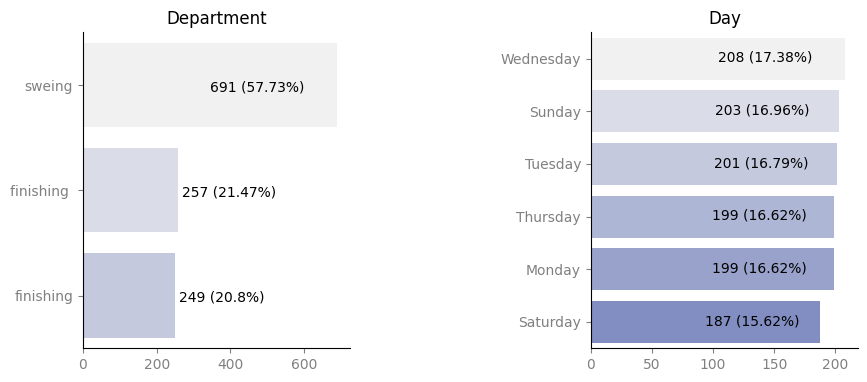

In [10]:
gr.Categoricos().plot_categorial(df, "",[ 'department','day'],(1,2))

- Vemos que há 2 departamentos, provavelmente algum erro de digitação. O processo de costura e o processo de finalização.

In [88]:
# Corrigir 
df['department'] = df['department'].apply(lambda x: x.strip())

<div id='0.2'>
<h2 id='categoricos_a' style="color:rosybrown">Correlação dos Dados Categóricos com a Produção</h2>

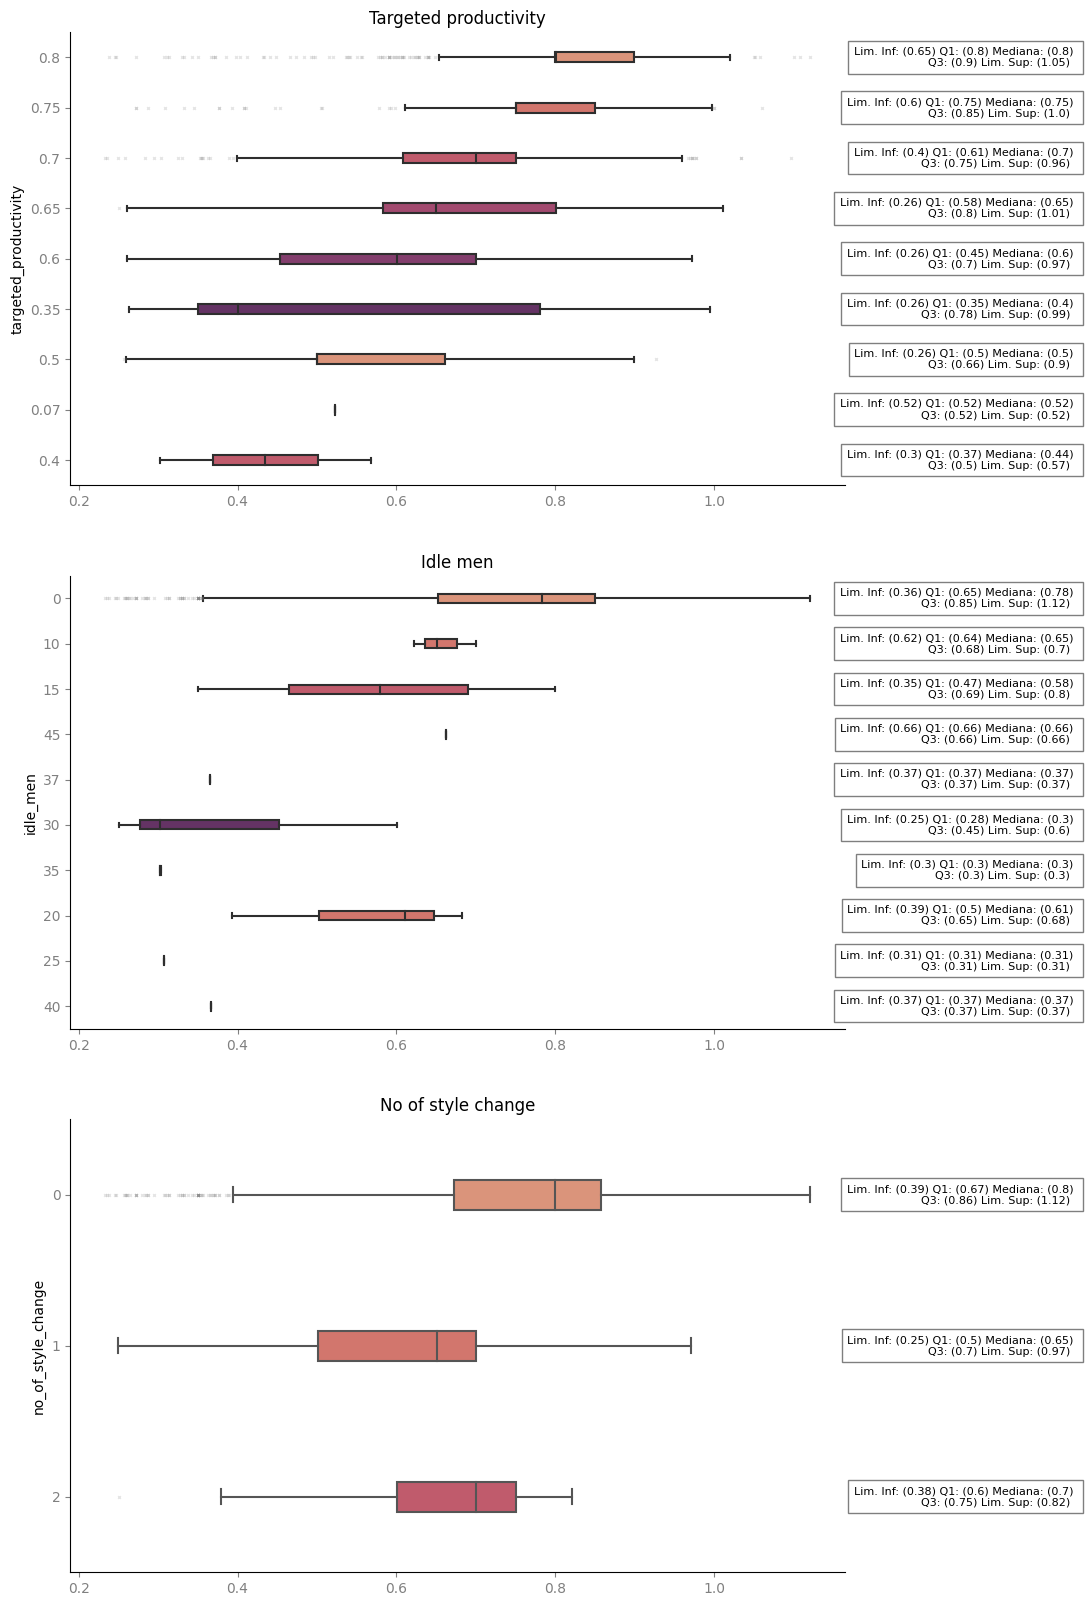

In [11]:
gr.Categoricos().plot_comparacao(df, '',['targeted_productivity', 'idle_men', 'no_of_style_change'],
                                 'actual_productivity',(3,1),20)

- O primeiro gráfico permite visualizar a dispersão da produtividade real em relação a cada meta de produtividade. Como observado anteriormente, a faixa de 0.7 a 0.8 é onde se concentra a meta de produtividade. Neste cenário, a produtividade em 0.8 e 0.75 mantém-se bastante semelhante em comportamento, com a mediana e o primeiro quartil apresentando resultados iguais à meta. Isso indica que, pelo menos, 25% dos objetivos são alcançados, com 25% da produção abaixo desse valor e 50% acima da meta a ser alcançada. Identificamos também a presença de outliers nessas categorias. Em relação às metas menores, observamos uma variação significativa, possivelmente devido à rara ocorrência desse evento.

- Quanto ao número de trabalhadores parados, com base na análise anterior, deduzimos que é um fenômeno tão raro que outro tratamento aplicado aqui seria mais adequado. No entanto, fica claro que ter trabalhadores parados reduz consideravelmente a produção.

- Por fim, é evidente que quanto maiores forem as mudanças no estilo das roupas, menor será a produtividade.

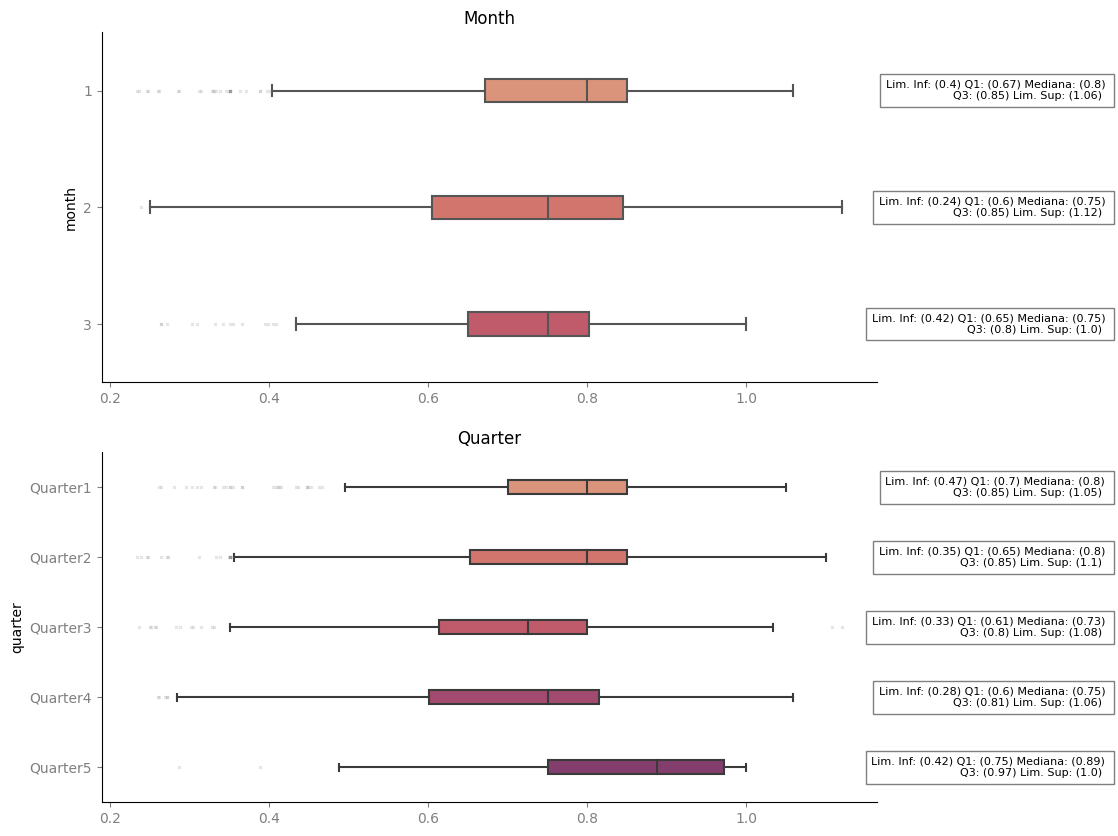

In [12]:
gr.Categoricos().plot_comparacao(df, '',['month', 'quarter'],
                                 'actual_productivity',(2,1),10)

- Na análise mensal, observa-se que no segundo mês houve uma redução significativa na produtividade, como evidenciado pelo valor do limite inferior, que é duas vezes menor do que nos meses 1 e 3.

- Esse fenômeno anterior é confirmado ao analisar os intervalos temporais.

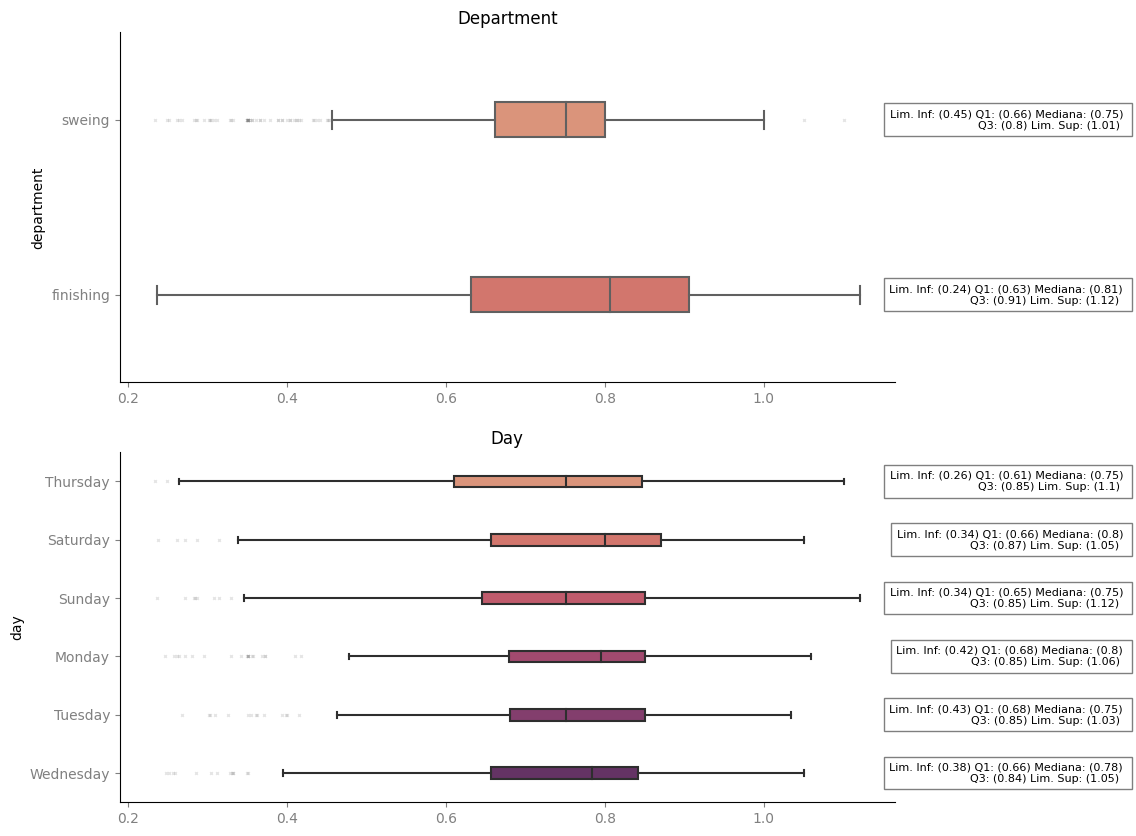

In [89]:
gr.Categoricos().plot_comparacao(df, '',['department','day'],
                                 'actual_productivity',(2,1),10)

- Ao analisar por departamento, torna-se evidente que a equipe de finalização apresenta uma amplitude maior de produtividade, indicando que a ocorrência de baixa produtividade é mais comum nesse setor.

- Ao examinar as informações sobre os dias da semana, fica subentendido que a operação não é realizada às sextas-feiras, tornando a quinta-feira o dia anterior ao descanso dos funcionários. Isso pode ser a razão pela qual a amplitude nas quintas-feiras é maior do que nos outros dias, já que é comum registrar uma produção mais baixa nesse dia.

<div id='0.3'>
<h2 id='numericos_d' style="color:rosybrown">Dispersão dos Dados Numéricos</h2>

In [14]:
gr.Numericos().features(df)

['smv',
 'wip',
 'over_time',
 'incentive',
 'no_of_workers',
 'actual_productivity']

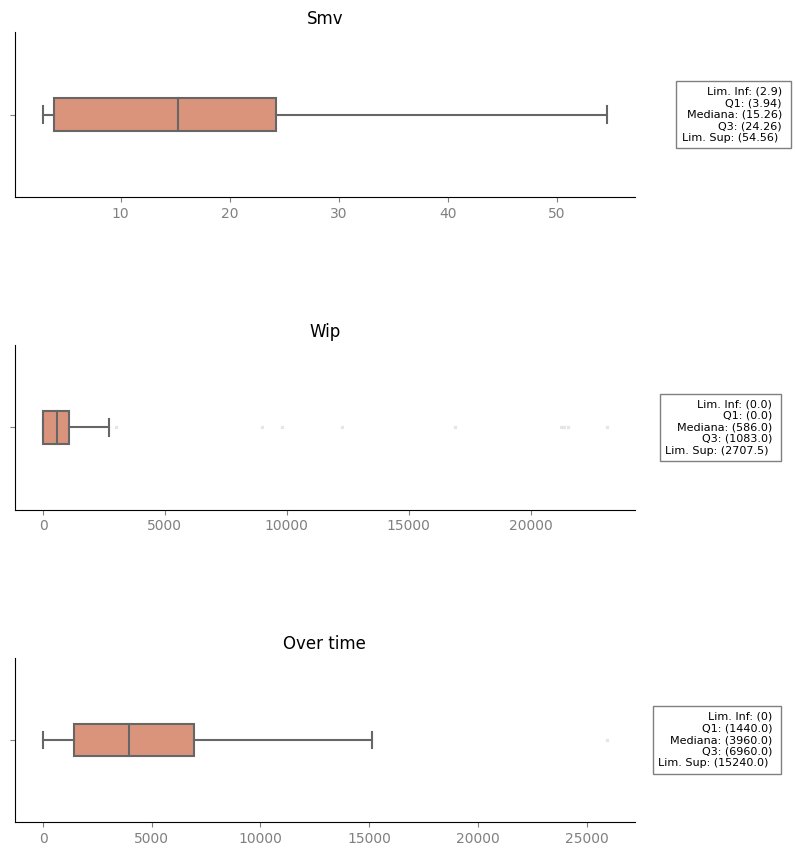

In [15]:
gr.Numericos().plot_numerics(df, '',['smv','wip','over_time'],(3,1))

- Vemos que o número de itens em trabalho apresenta outliers com valores acima de 2707.
- Em relação as horas extras por equipe, vemos que valores até 15240 horas está dentro do comum.

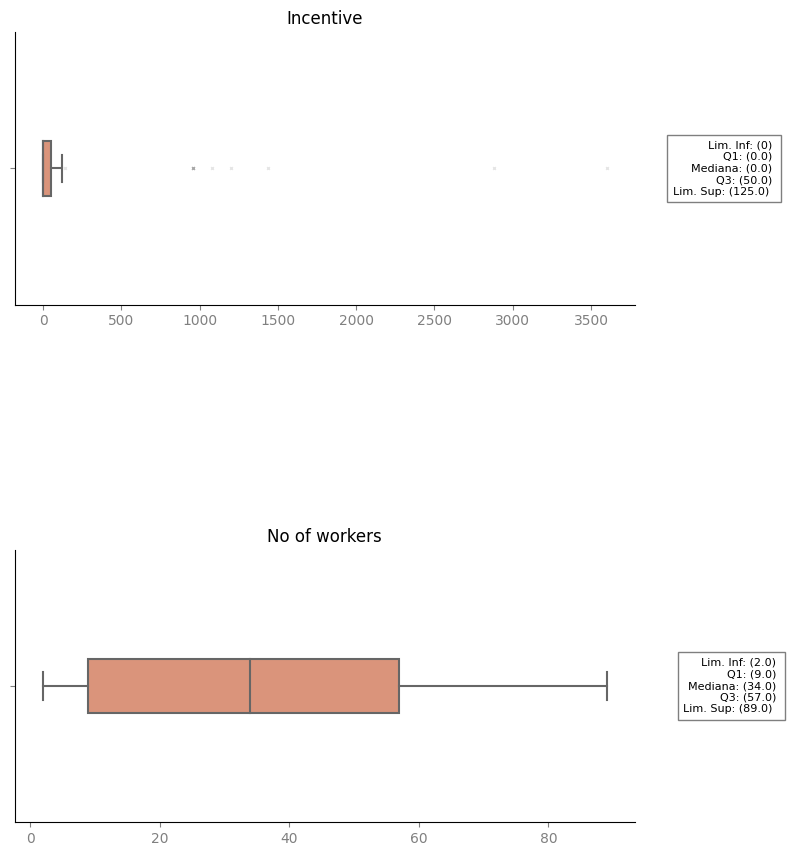

In [16]:
gr.Numericos().plot_numerics(df, '',['incentive', 'no_of_workers'],(2,1))

- Vemos que um incentivo mais alto não é algo tão comum.
- O número da quantidade de membros por equipe pode variar de 2 até 89.

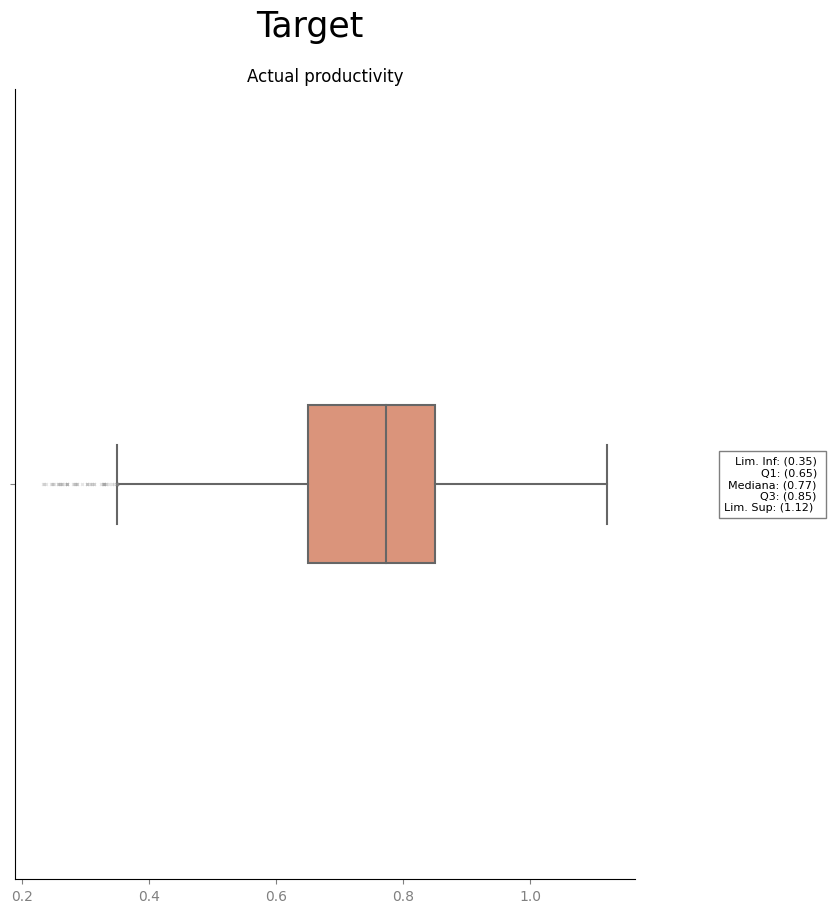

In [17]:
gr.Numericos().plot_numerics(df, 'Target ',['actual_productivity'],(1,1))

- Analisando nossa variável alvo, vemos que a tendência é variar de 0.35 até 1.12, mas valores inferiores de 0.35 foram identificados.

<div id='0.4' style="color:rosybrown">
    <h2 id='numericos_a' >Correlação dos Dados Numéricos com a Produção</h2>
    <p>Como há outliers nos dados, a visualização da interação entre ambos vai ser comprometida, sendo assim, será necessário remover esses outliers para então pode melhorar o entendimento do comportamento.</p>
</div>

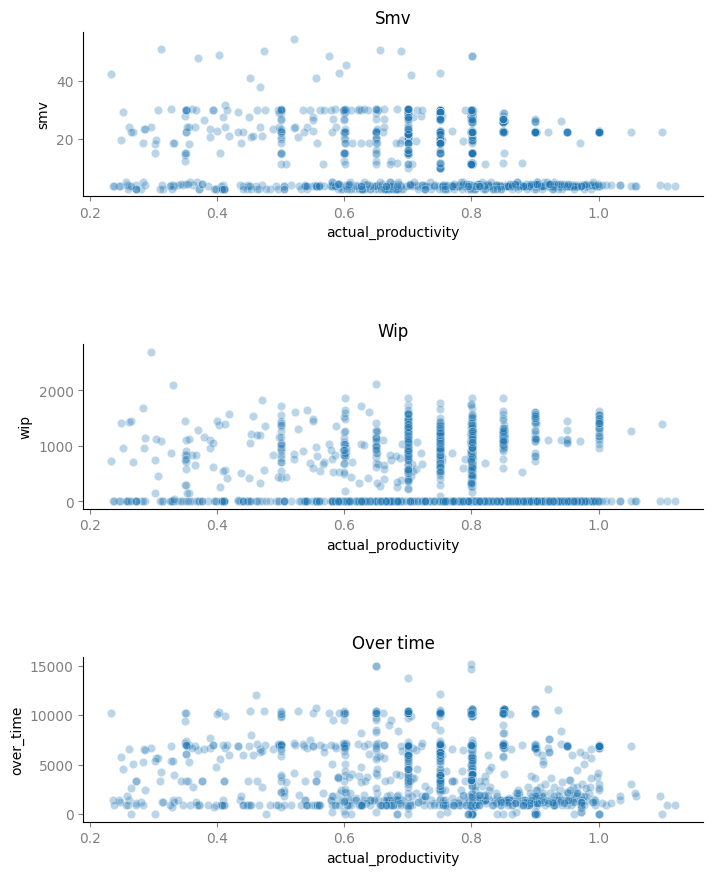

In [18]:
gr.Numericos().plot_comparacao(df, '',['smv','wip','over_time'],'actual_productivity',(3,1))

- Os gráficos acima não nos trazem informações muito claras e úteis, sendo uma conclusão que atividades a serem feitas elevada tem relação com a produtividade alta, assim como o número de horas extras.

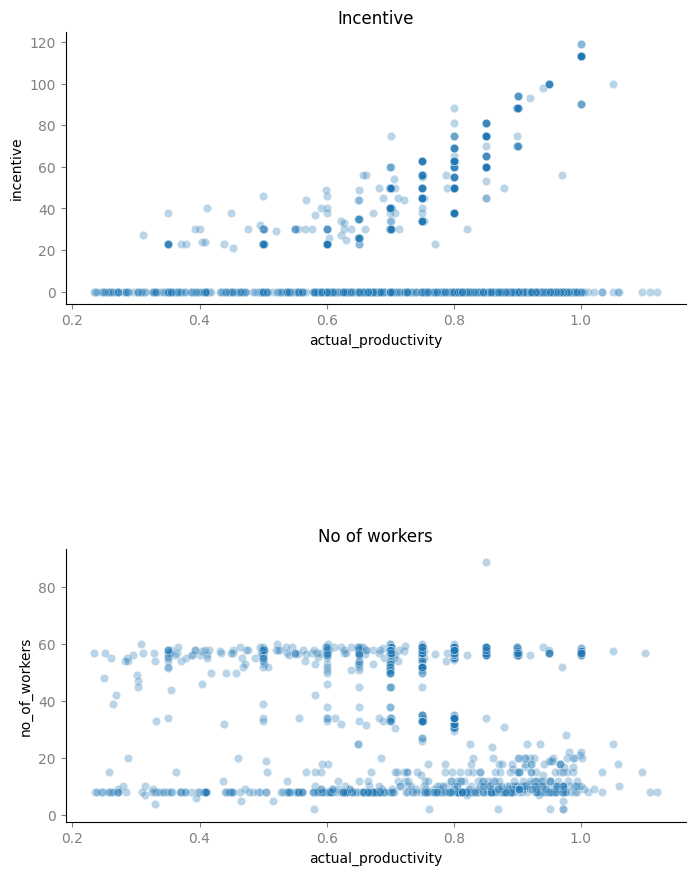

In [19]:
gr.Numericos().plot_comparacao(df, '',['incentive', 'no_of_workers'],'actual_productivity',(2,1))

- Vemos que o valor do incentivo está diretamente relacionado com a produtividade.
- Já o número de funcionários por equiepe não demostra afetar muito a produtividade.

<div id='0.5'>
<h2 id='numericos_a' style="color:rosybrown">Análise da Série Temporal</h2>

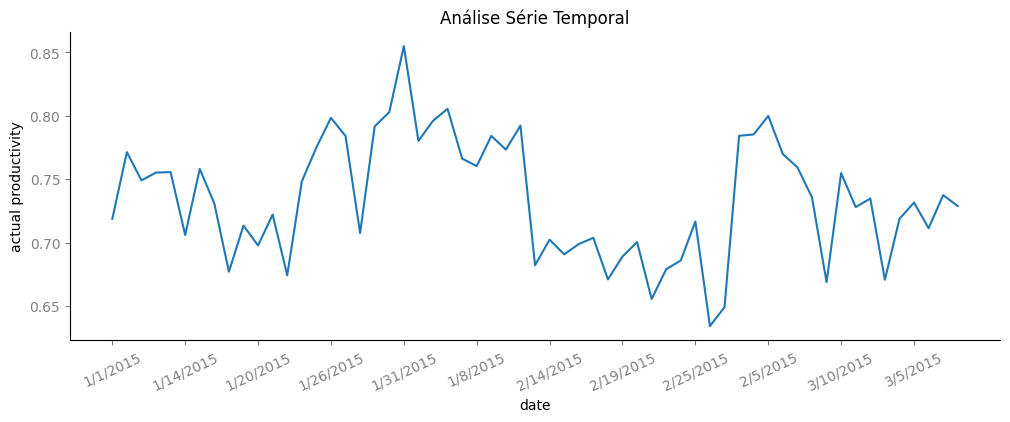

In [52]:
gr.Analise(df).temporal('date', 'actual_productivity')

<div id='0.5'>
<h2 id='numericos_a' style="color:rosybrown">Buscando Respostas</h2>

<div id='0.5'>
<h4 id='numericos_a' style="color:rosybrown">Qual é a média de membro por time?</h4>

In [191]:
df.groupby(['team'], as_index=False)['no_of_workers'].median().sort_values(by='no_of_workers', ascending=False)

,team,no_of_workers
7,5,58.0
0,1,56.5
5,3,56.0
6,4,56.0
9,7,56.0
2,11,54.0
10,8,52.0
11,9,52.0
1,10,50.0
4,2,45.0


In [192]:
df.groupby(['team','department'], as_index=False)['no_of_workers'].median().sort_values(by='no_of_workers', ascending=False)

,team,department,no_of_workers
23,9,sweing,58.00
15,5,sweing,58.00
1,1,sweing,57.75
13,4,sweing,57.50
21,8,sweing,57.00
19,7,sweing,57.00
9,2,sweing,57.00
11,3,sweing,57.00
3,10,sweing,56.00
5,11,sweing,55.00


- Os times 1 e 5 apresentam a maior média de trabalhores na equipe. O uso da mediana acima foi para evitar que algum valor muito acima ou abaixo acabe interferindo na análise 
- A análise acima deixa claro que a etapa de costura é a que tem maior demanda de trabalhores, enquanto a finalização é a que demanda menos gente.

<div id='0.5'>
<h4 id='numericos_a' style="color:rosybrown">Os times atuam em ambos os departamentos?</h4>

In [197]:
df.groupby(['team','department'])['department'].count()

team  department
1     finishing     49
      sweing        56
10    finishing     43
      sweing        57
11    finishing     29
      sweing        59
12    finishing     40
      sweing        59
2     finishing     52
      sweing        57
3     finishing     37
      sweing        58
4     finishing     46
      sweing        59
5     finishing     35
      sweing        58
6     finishing     35
      sweing        59
7     finishing     41
      sweing        55
8     finishing     53
      sweing        56
9     finishing     46
      sweing        58
Name: department, dtype: int64

- Sim, como visto acima.

<div id='0.5'>
<h4 id='numericos_a' style="color:rosybrown">Qual time que faz mais hora extra?</h4>

In [215]:
df.loc[df['over_time'].astype(float) > 0].groupby(['team'])['over_time'].agg(['median','mean', 'count']).sort_values(by='median', ascending=False)

,median,mean,count
team,,,
5,6960.0,5508.666667,90
3,6780.0,5550.978261,92
4,6210.0,5502.115385,104
7,6000.0,4908.315789,95
10,5640.0,4934.062500,96
9,4140.0,4562.912621,103
1,3960.0,4983.267327,101
12,3780.0,3351.785714,98
2,3660.0,4552.000000,105


- Acima a equipe com o número maior de horas extras foi a equipe 5. Já a equipe 11 foi o que teve o número menor de horas extras. Algumas hipóteses podem ser levantadas: Há menos membros em uma equipe do que na outra? O nível de demanda por equipe é diferente:? Uma equipe tem um melhor desempenho que outra?

<div id='0.5'>
<h4 id='numericos_a' style="color:rosybrown">Qual o time com maior SMV?</h4>

In [220]:
df.groupby(['team'])['smv'].agg(['median','mean', 'count','max']).sort_values(by='mean', ascending=False)

,median,mean,count,max
team,,,,
5,20.79,18.220645,93,50.89
7,23.54,17.653958,96,48.84
3,22.52,17.316737,95,42.27
4,22.52,16.905333,105,50.48
8,15.09,15.769908,109,40.99
9,18.79,15.493077,104,54.56
1,22.52,15.370857,105,49.10
10,21.25,14.738200,100,50.48
2,15.28,14.640734,109,51.02


- Na média, foi o grupo 5. Já pela mediana foi o grupo 7.

<div id='conclusao' style="color:rosybrown">
    <h1 id='conclusao' style="text-align:center">Conclusão</h1>
    <p> Como o objetivo desse projeto é o desenvolvimento do modelo de machine learning, abaixo estará listada as observações para a transformação dos dados de acordo com o que foi entendido para a melhora do modelo de machine learning.</p><br>
    <li>idle_men transformar em uma variável binária</li>
    <li>target_productivity com classes raras que devem ser incorporadas</li>
    <li>decomporto dados de dada</li>
    <li>Arrumar o formato de dados com menos categorias</li>
    <li>Dados com outliers pode ser necessário o power transformation</li>